# PHD problem
# To predict the driving style of the driver. 1= aggressive, 2= normal and 3 = vague

In [5]:
import numpy as pd
v = pd.array([8.218, -9.341])
w = pd.array([-1.129, 2.111])
v + w

array([ 7.089, -7.23 ])

# Attribute details

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
%matplotlib inline

In [19]:
# Importing libraries for plotting and na values
import cufflinks as cf
import missingno as msno

In [20]:
init_notebook_mode(connected = True)

In [21]:
cf.go_offline(connected=True)

In [4]:
#Reading the files
train_veh_data=pd.read_csv("F:\INSOFE\PHD\Train_Vehicletravellingdata.csv")
train_weather_data=pd.read_csv("F:\INSOFE\PHD\Train_WeatherData.csv")
train_data=pd.read_csv("F:\INSOFE\PHD\Train.csv")

In [5]:
# Seeing some recodrs of Vehicle data file
train_data.head(5)

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [6]:
train_data.dtypes

ID              object
V2               int64
V5               int64
V6               int64
DrivingStyle     int64
dtype: object

In [7]:
# no. of records
train_data.shape

(12994, 5)

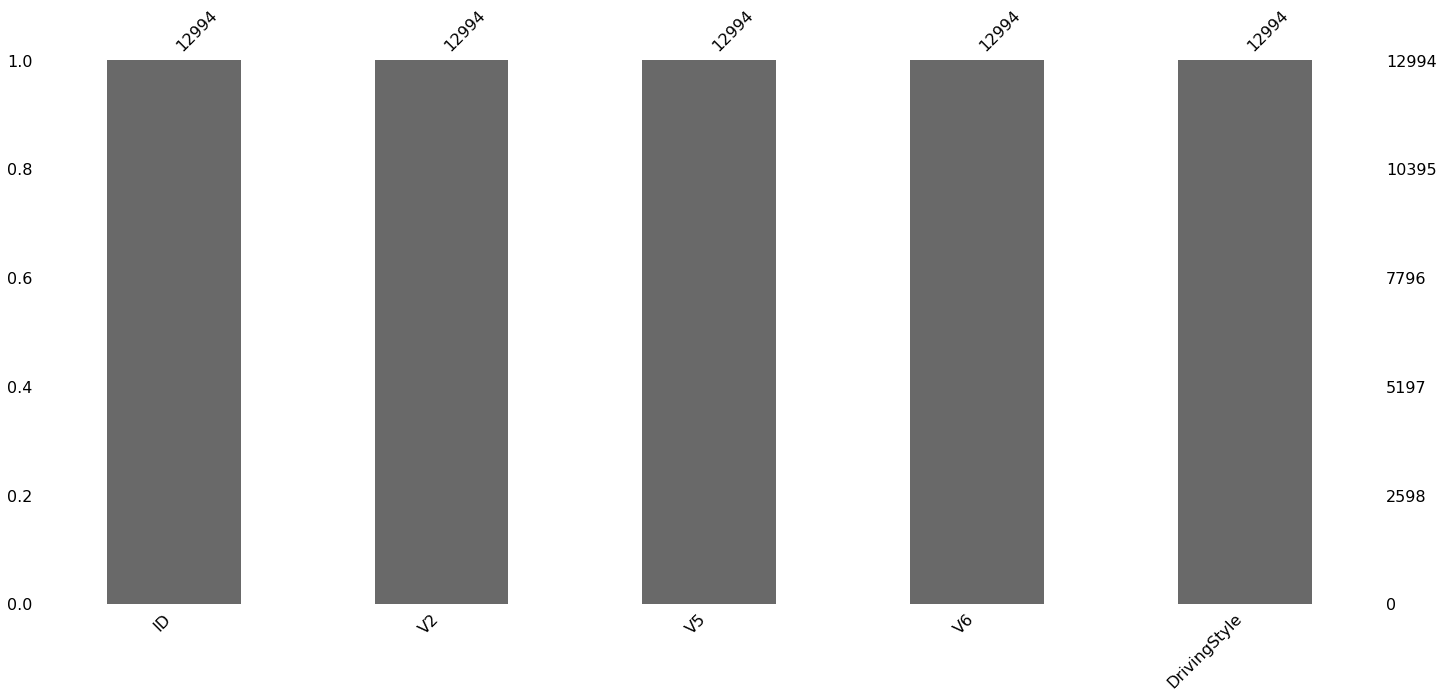

In [8]:
# Checking for missing values in train dataset
msno.bar(train_data)
# no missing values

In [9]:
#Finding how the driving style is in train data
print(train_data['DrivingStyle'].value_counts())

2    6422
3    3798
1    2774
Name: DrivingStyle, dtype: int64


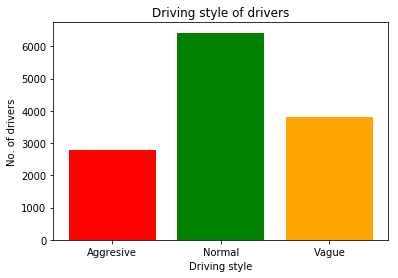

In [10]:
x1 = ['Aggresive','Normal','Vague']
y1 = [2774,6422,3798]
plt.bar(x1,y1,align="center",color=('red','green','orange'))
plt.xlabel("Driving style")
plt.ylabel("No. of drivers")
plt.title("Driving style of drivers")
plt.show()
# Most drivers have a normal driving style

In [11]:
# Number of axles count wrt to vehicles
print(train_data['V6'].value_counts())

2    7583
6    2366
5    1575
4     858
3     575
7      35
9       1
8       1
Name: V6, dtype: int64


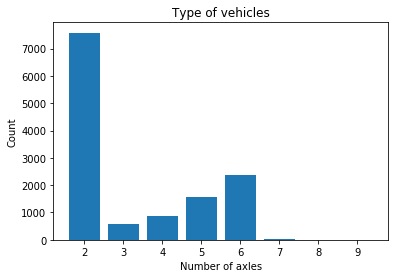

In [26]:
x1 = ['2','3','4','5','6','7','8','9']
y1 = [7583,575,858,1575,2366,35,1,1]
plt.bar(x1,y1,align="center")#color=('red','green','orange')
plt.xlabel("Number of axles")
plt.ylabel("Count")
plt.title("Type of vehicles")
plt.show()
# MOst of the vehicles are 2 axles which are usually passenger vehicles

In [12]:
axl = (train_data['V6'].value_counts()/sum(train_data['V6'].value_counts()))*100
axl

2    58.357704
6    18.208404
5    12.120979
4     6.603048
3     4.425119
7     0.269355
9     0.007696
8     0.007696
Name: V6, dtype: float64

In [24]:
temp=[]
for i in train_data['V6'].unique():
    if i in axl:
        temp.append(axl[i])
temp

[58.35770355548715,
 18.208403878713252,
 6.603047560412498,
 4.425119285824226,
 12.12097891334462,
 0.2693550869632138,
 0.007695859627520394,
 0.007695859627520394]

In [22]:
temp = train_data.V6.value_counts()
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'auto',
               name = 'Axles')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Axles in vehicles"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
del temp

In [25]:
#labels = ["Pre processing and Visualization", "Model Building", "Misc"]
# values = temp
#trace = go.Pie(labels=labels, values=values)
trace = go.Pie(labels=train_data['V6'].unique(),values=temp)

layout = go.Layout(title = 'Number of axles in vehicles')
data = [trace]
fig = go.Figure(data= data,layout=layout)
iplot(fig)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

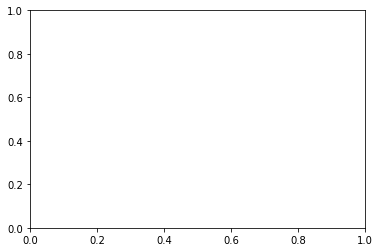

In [32]:
y2=train_data.V6.value_counts()
x2= train_data.DrivingStyle.value_counts()
yp= np.arange(len(y2))#train_data.DrivingStyle
plt.bar(x2,y2,align="center")
plt.xlabel("No. of Axles")
plt.ylabel("Driving Style")
plt.title("Axle vs Driving Style")
plt.show()

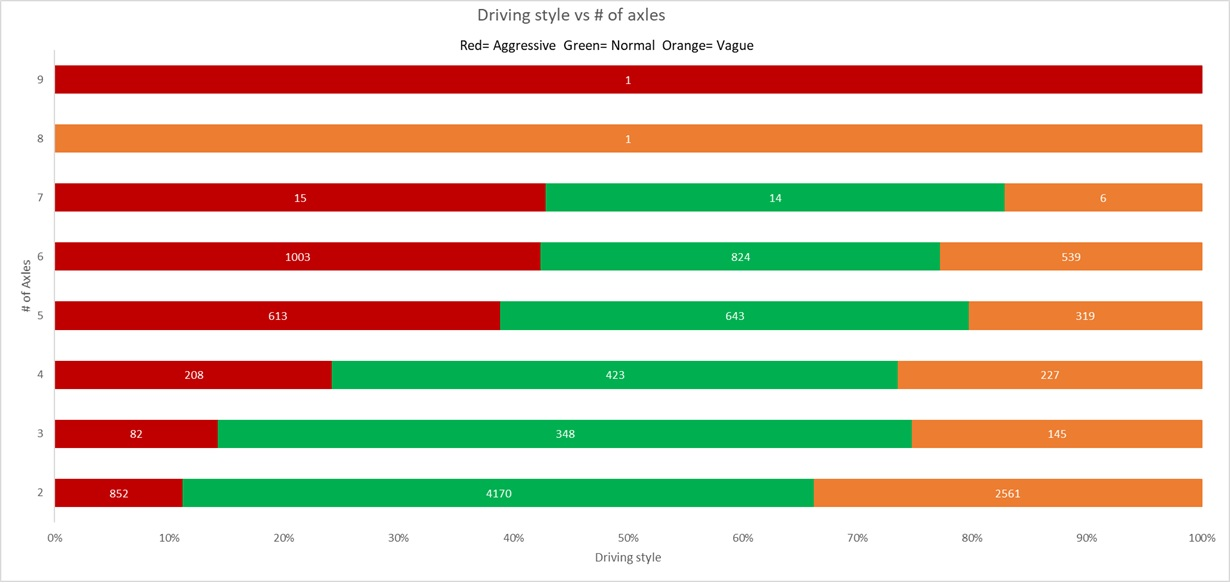

In [33]:
#Checking driving style versus number of axles
from IPython.display import Image
Image("F:/INSOFE/PHD/Driving styles vs axles.JPG")

In [27]:
train_veh_data.head(10)

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry
3,DR_24526,2012-03-21 09:15:48,2,84,57228,89,1945,544,127.0,Dry
4,DR_24526,2012-03-21 09:15:54,1,89,57231,88,13787,1893,42.0,Dry
5,DR_24526,2012-03-21 09:16:19,2,91,57232,84,2637,586,30.0,Dry
6,DR_24526,2012-03-21 09:16:25,2,92,57234,91,10243,1265,4.0,Dry
7,DR_24526,2012-03-21 09:16:28,2,90,57235,92,10915,1247,2.0,Dry
8,DR_24526,2012-03-21 09:17:16,2,92,57236,90,1316,456,47.0,Dry
9,DR_24526,2012-03-21 09:17:48,2,84,57237,92,2489,517,31.0,Dry


In [28]:
train_veh_data.shape

(162566, 10)

In [29]:
train_veh_data.dtypes

ID      object
V1      object
V3       int64
V4       int64
V7       int64
V8       int64
V9       int64
V10      int64
V11    float64
V18     object
dtype: object

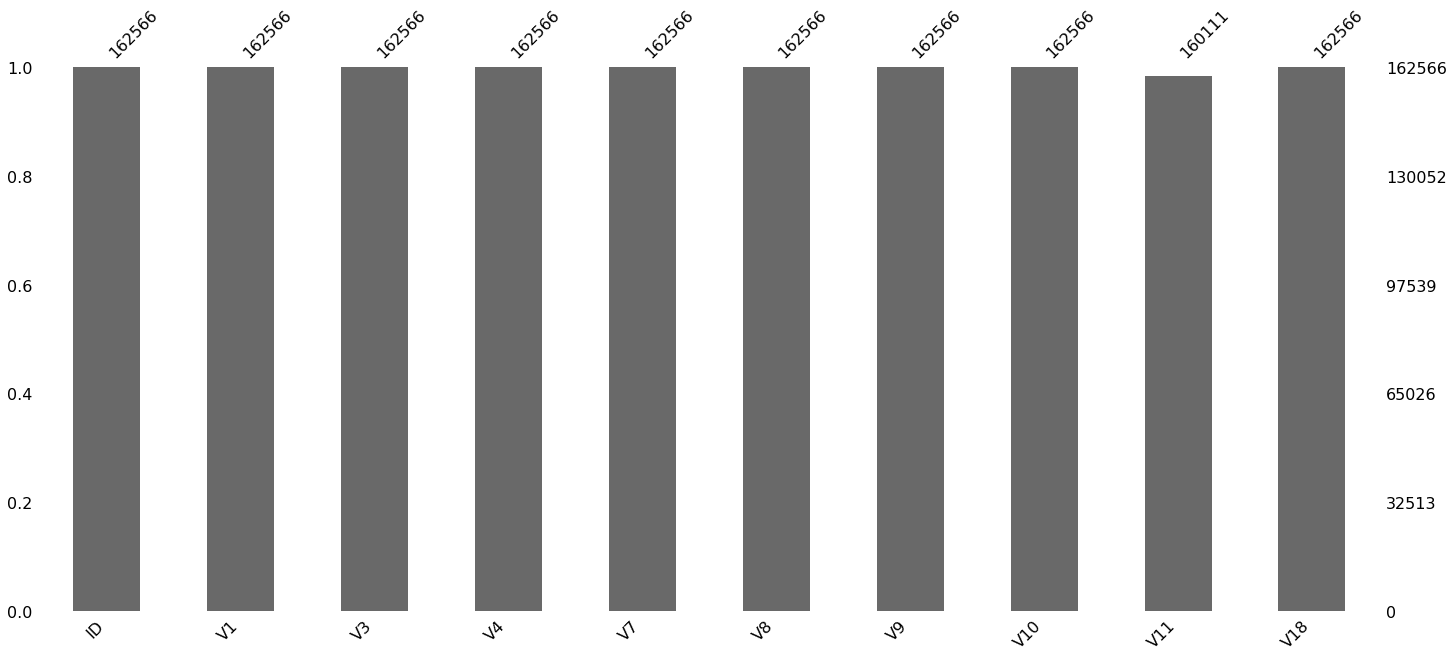

In [34]:
#V4,V8, V11
#Checking for null values in Vehicle dataset
msno.bar(train_veh_data)
# Only V11=Time gap with the preceeding vehicle in seconds

# Imputing NA values for Vehicle data

In [35]:
train_veh_data['V11'].fillna((train_veh_data['V11'].mean()), inplace=True)

In [36]:
train_veh_data.isnull().sum()

ID     0
V1     0
V3     0
V4     0
V7     0
V8     0
V9     0
V10    0
V11    0
V18    0
dtype: int64

# Initial observations on this data set

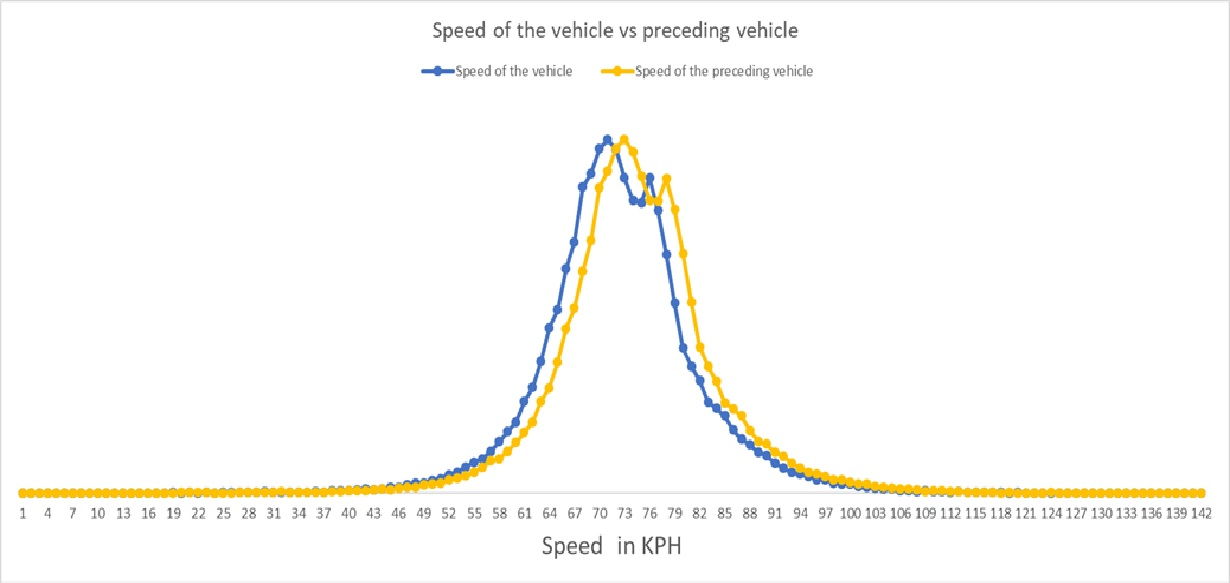

In [47]:
#Speed comparison of the vehicle to preceding vehicle
Image("F:/INSOFE/PHD/Speed comp.JPG")

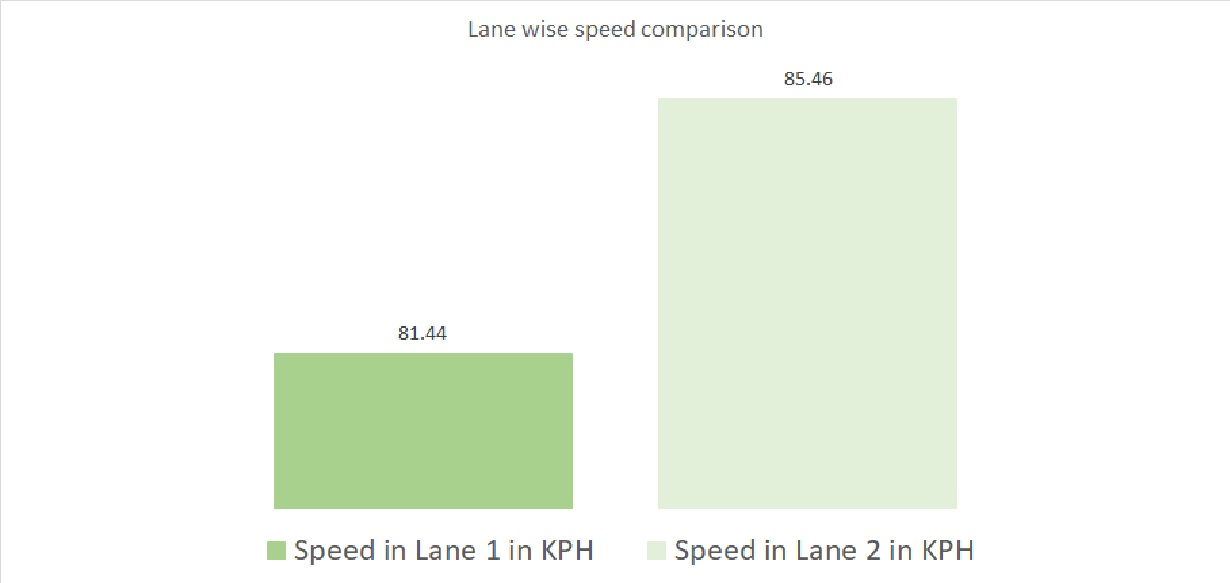

In [48]:
# lane wise speed comparison
Image("F:/INSOFE/PHD/Lane vs speed.JPG")

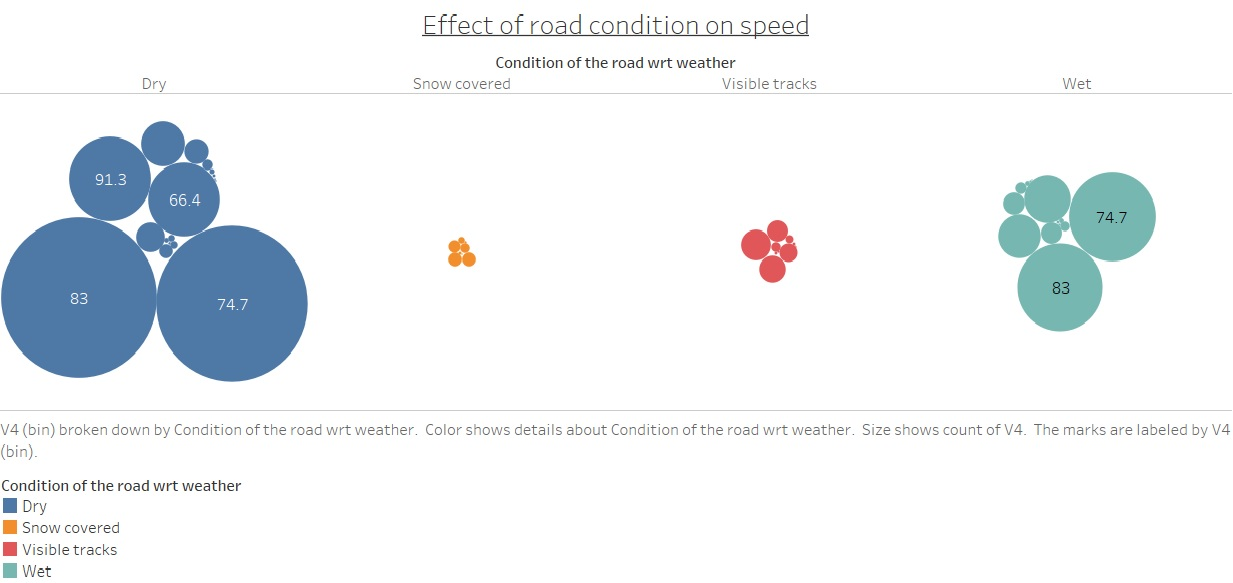

In [49]:
# Effect of road condition on speed
Image("F:/INSOFE/PHD/road cond.JPG")

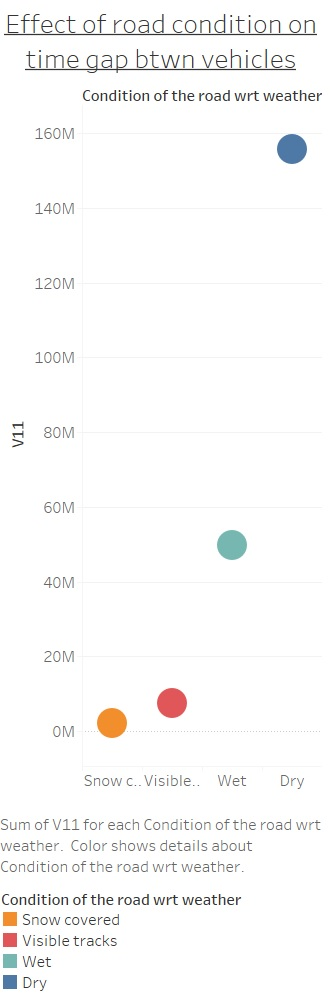

In [50]:
# Effect of road condition on speed
Image("F:/INSOFE/PHD/timelapse.JPG")

# Findind & imputing NA values in Weather data set

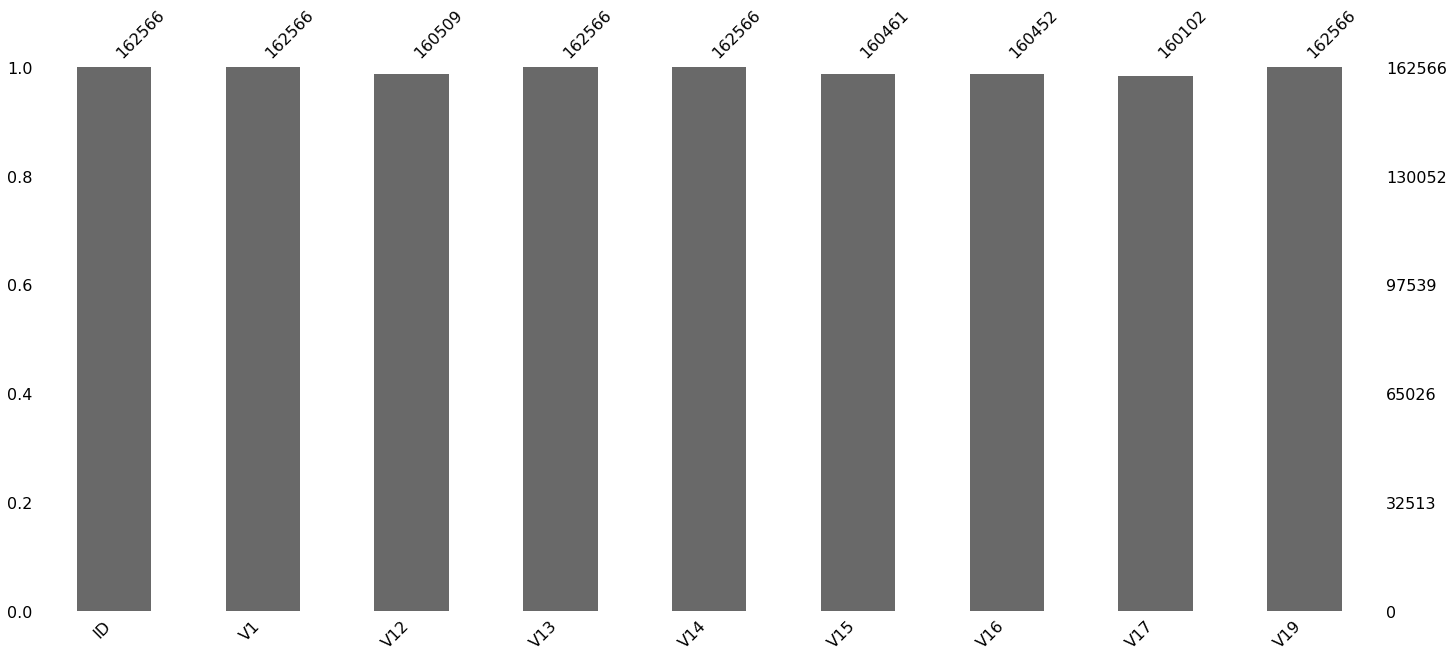

In [51]:
#Checking for null values in Weather dataset
msno.bar(train_weather_data)
# V12,V14, V15, V16, V17 have missing values, though not much

In [57]:
train_weather_data['V12'].fillna((train_weather_data['V12'].mean()), inplace=True)
train_weather_data['V15'].fillna((train_weather_data['V15'].mean()), inplace=True)
train_weather_data['V16'].fillna((train_weather_data['V16'].mean()), inplace=True)
train_weather_data['V17'].fillna((train_weather_data['V17'].mean()), inplace=True)

# Merging the file

In [61]:
data_merge1 = pd.merge(train_weather_data,train_veh_data,on="ID",how="left")

In [62]:
final_merge1= pd.merge(data_merge,train_data,on="ID", how="left")

In [71]:
final_merge1.shape

(3663006, 22)

In [72]:
final_merge1.dtypes

ID               object
V1_x             object
V12             float64
V13              object
V14              object
V15             float64
V16             float64
V17             float64
V19              object
V1_y             object
V3                int64
V4                int64
V7                int64
V8                int64
V9                int64
V10               int64
V11             float64
V18              object
V2                int64
V5                int64
V6                int64
DrivingStyle      int64
dtype: object

In [73]:
final_merge1.head(5)

,ID,V1_x,V12,V13,V14,V15,V16,V17,V19,V1_y,...,V7,V8,V9,V10,V11,V18,V2,V5,V6,DrivingStyle
0,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,2012-03-21 09:14:55,...,57227,87,16986,941,94.0,Dry,1265,10243,2,2
1,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,2012-03-21 09:15:07,...,57229,81,1708,551,11.0,Dry,1265,10243,2,2
2,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,2012-03-21 09:15:12,...,57230,88,22892,1698,4.0,Dry,1265,10243,2,2
3,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,2012-03-21 09:15:48,...,57228,89,1945,544,127.0,Dry,1265,10243,2,2
4,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,2012-03-21 09:15:54,...,57231,88,13787,1893,42.0,Dry,1265,10243,2,2


In [74]:
#Confirming for null values in the merged data set
final_merge1.isnull().sum()
# there are no null values

ID              0
V1_x            0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V19             0
V1_y            0
V3              0
V4              0
V7              0
V8              0
V9              0
V10             0
V11             0
V18             0
V2              0
V5              0
V6              0
DrivingStyle    0
dtype: int64

In [76]:
merged_csv=pd.DataFrame(final_merge1)

In [77]:
merged_csv.to_csv('merged1.csv', index = False)

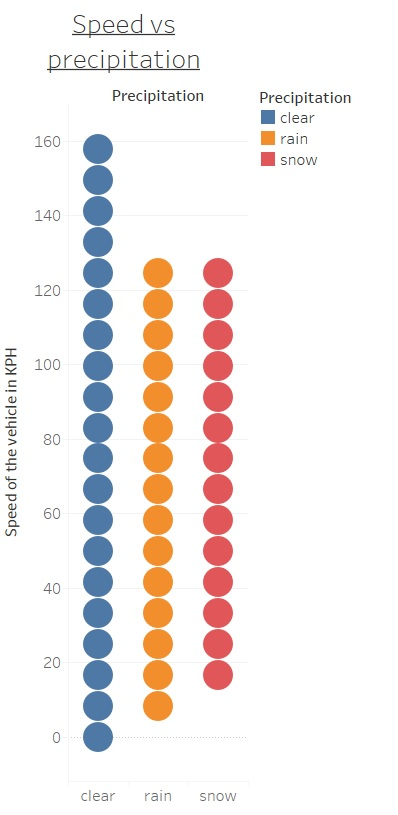

In [70]:
# Effect of precipitaion on speed
Image("F:/INSOFE/PHD/Precipitation.JPG")

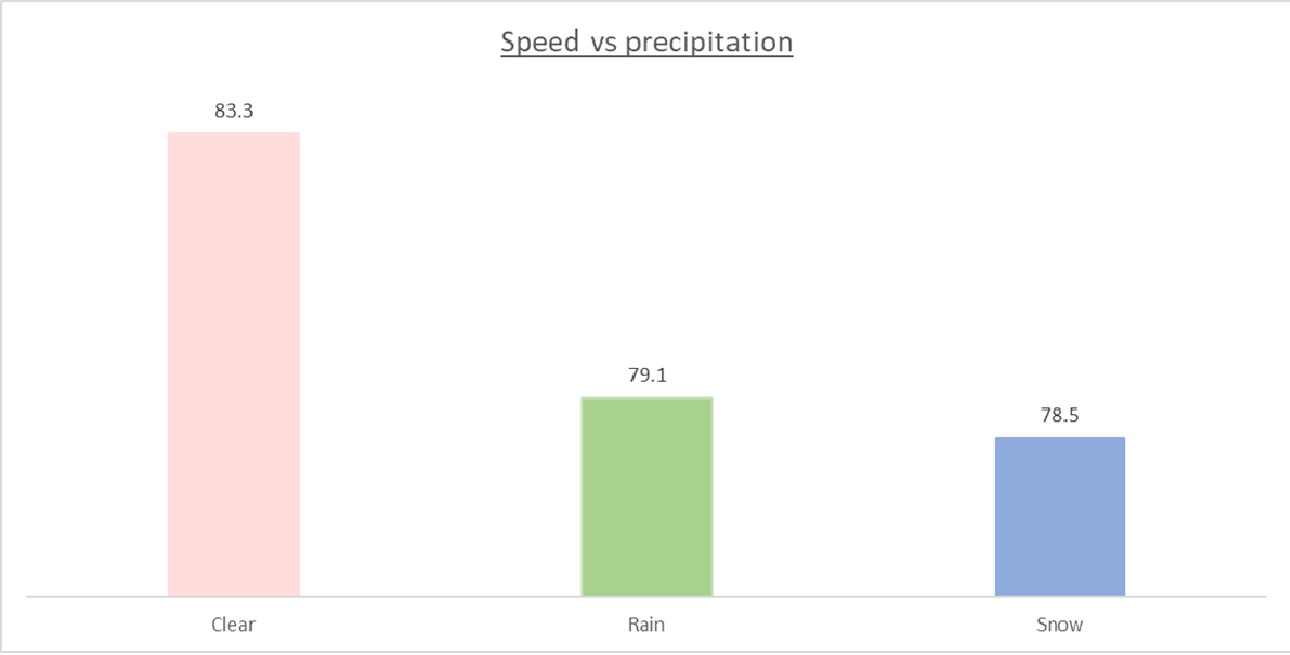

In [78]:
# Effect of precipitaion on speed
Image("F:/INSOFE/PHD/Precipitation-2.JPG")